<a href="https://colab.research.google.com/github/assaabriiii/My-Machine-Learning-Journey/blob/main/traffic_sign_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [4]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from PIL import Image
from sklearn.model_selection import train_test_split

In [3]:
od.download("https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: assaabriiii
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


100%|██████████| 612M/612M [00:03<00:00, 189MB/s] 


In [8]:
import os
from PIL import Image
import numpy as np

# 1. Define the base directory
# If you are on Colab and downloaded via opendatasets, it's usually this:
base_dir = 'gtsrb-german-traffic-sign'

# 2. robustly find the 'Train' or 'train' folder
train_dir = os.path.join(base_dir, 'Train')

if not os.path.exists(train_dir):
    train_dir = os.path.join(base_dir, 'train') # Try lowercase
    if not os.path.exists(train_dir):
        print(f"❌ Error: Could not find 'Train' folder inside {base_dir}")
        print(f"Folders found: {os.listdir(base_dir)}")
        # Stop here if we can't find the folder
        raise FileNotFoundError("Check your folder path!")

print(f"✅ Found dataset at: {train_dir}")

# 3. Load Images
data = []
labels = []
classes = 43

print("Loading images...")

for i in range(classes):
    path = os.path.join(train_dir, str(i))

    # Check if this specific class folder exists
    if not os.path.exists(path):
        print(f"Skipping class {i}: Folder not found.")
        continue

    images = os.listdir(path)

    for a in images:
        try:
            # SAFETY 1: Use os.path.join (Works on Mac/Linux/Windows)
            image_path = os.path.join(path, a)

            image = Image.open(image_path)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(f"Error loading image: {image_path} - {e}")

# Convert to numpy arrays
data = np.array(data)
labels = np.array(labels)

print(f"🎉 Success! Loaded {len(data)} images.")
print(f"Data Shape: {data.shape}")

✅ Found dataset at: gtsrb-german-traffic-sign/Train
Loading images...
🎉 Success! Loaded 39209 images.
Data Shape: (39209, 30, 30, 3)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 43) # One-Hot Encoding (Like 'dummies' for categories)
y_test = to_categorical(y_test, 43)

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(30, 30, 3)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Kill 25% of neurons to prevent memorizing

# --- BLOCK 2: Detecting Details (Symbols, Text) ---
# 64 Filters, 3x3 Window (Good for small details like numbers '60' or '80')
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# --- CLASSIFIER HEAD: Thinking & Deciding ---
model.add(Flatten()) # Turn the 3D cube into a flat list of numbers

model.add(Dense(256, activation='relu')) # The main brain (256 neurons)
model.add(Dropout(0.5)) # Heavy dropout here (50%) is crucial for generalization

# Output Layer: 43 Neurons for 43 Traffic Signs
model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print("Starting Training...")
history = model.fit(
    X_train, y_train,
    batch_size=64,
    epochs=15,
    validation_data=(X_test, y_test)
)

model.save("traffic_sign_model.h5")
print("Model saved as 'traffic_sign_model.h5'")

Starting Training...
Epoch 1/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2417 - loss: 4.2562 - val_accuracy: 0.7511 - val_loss: 0.9178
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6614 - loss: 1.1510 - val_accuracy: 0.8735 - val_loss: 0.4289
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7613 - loss: 0.8041 - val_accuracy: 0.9241 - val_loss: 0.3010
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8141 - loss: 0.6206 - val_accuracy: 0.9467 - val_loss: 0.1962
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8656 - loss: 0.4410 - val_accuracy: 0.9654 - val_loss: 0.1164
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8986 - loss: 0.3386 - val_accuracy: 0.9661 - val_loss: 0.1146
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9099 - loss: 0.2951 - val_accuracy: 0.9751 - val_loss: 0.0835
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9278 - loss: 0.

Model saved as 'traffic_sign_model.h5'


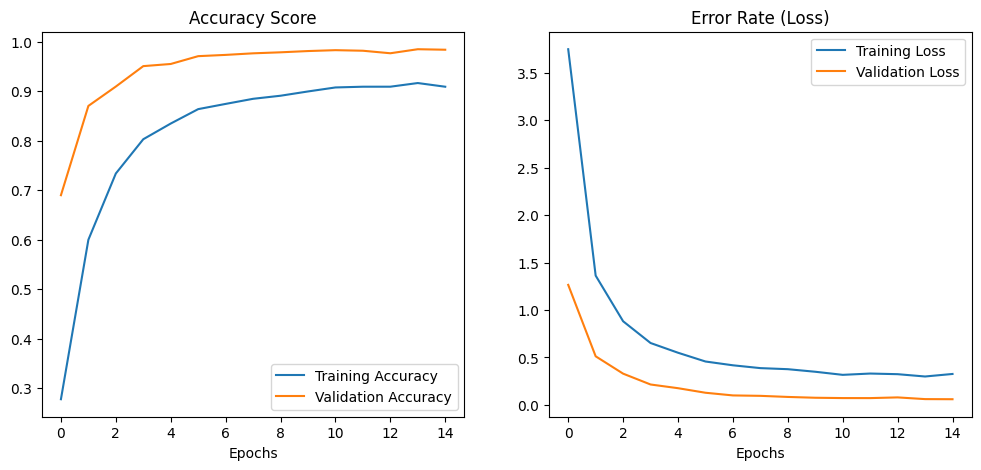

In [16]:
import matplotlib.pyplot as plt
# layer --> max pooling
# 491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9093 - loss: 0.3216 - val_accuracy: 0.9842 - val_loss: 0.0593
# layer --> layer --> maxpooling
# 491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9437 - loss: 0.1927 - val_accuracy: 0.9828 - val_loss: 0.0572
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Score')
plt.xlabel('Epochs')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Error Rate (Loss)')
plt.xlabel('Epochs')
plt.legend()

plt.show()